In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AMD"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.670000,2.670000,2.670000,2.670000,2.670000,0
2015-01-05,2.670000,2.700000,2.640000,2.660000,2.660000,8878200
2015-01-06,2.650000,2.660000,2.550000,2.630000,2.630000,13912500
2015-01-07,2.630000,2.650000,2.540000,2.580000,2.580000,12377600
2015-01-08,2.590000,2.650000,2.560000,2.610000,2.610000,11136600
...,...,...,...,...,...,...
2023-05-08,89.989998,95.660004,89.169998,95.040001,95.040001,95503200
2023-05-09,94.889999,96.160004,93.430000,95.059998,95.059998,68674800
2023-05-10,96.419998,99.940002,96.120003,97.019997,97.019997,95619500


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2105 non-null   float64
 1   High       2105 non-null   float64
 2   Low        2105 non-null   float64
 3   Close      2105 non-null   float64
 4   Adj Close  2105 non-null   float64
 5   Volume     2105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,89.989998,95.660004,89.169998,95.040001,95.040001,95503200
2023-05-09,94.889999,96.160004,93.430000,95.059998,95.059998,68674800
2023-05-10,96.419998,99.940002,96.120003,97.019997,97.019997,95619500
2023-05-11,98.160004,99.190002,96.139999,97.099998,97.099998,57023300
2023-05-12,96.830002,97.449997,94.660004,94.889999,94.889999,24265406


In [7]:
data.shape

(2105, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,42.509919,43.396660,41.590214,42.510352,42.510352,5.818265e+07
std,39.545864,40.363703,38.665022,39.525950,39.525950,3.840087e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,10.290000,10.550000,9.990000,10.290000,10.290000,3.384800e+07
50%,27.030001,27.750000,26.450001,27.320000,27.320000,5.123930e+07
75%,79.730003,81.269997,77.989998,79.269997,79.269997,7.726130e+07
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

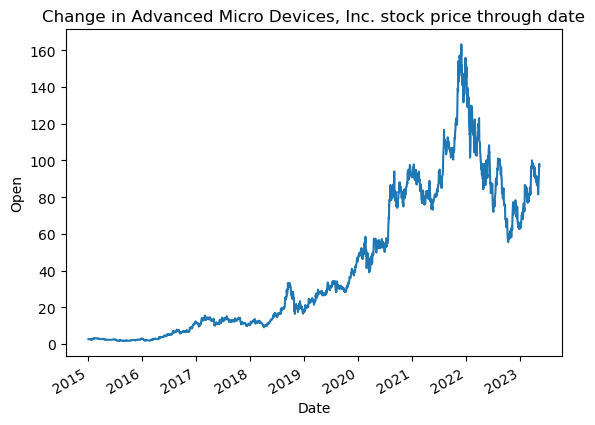

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Advanced Micro Devices, Inc. stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (527, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (527,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 88.18179855 111.36799995  33.59389908 102.83930077  28.71509972
   9.14930002  88.41909996  58.01339977  21.17680033   1.86569999
  22.5170001   13.30929987  85.70479973   6.88110009  11.44600001
   1.8658       6.95029996   2.35040004  33.93419918   1.99610001
  10.04870009  13.84979996  11.54369996  12.73839992   2.61339997
  99.15720039  86.36689987  76.49289955 105.0933004   86.18890015
  33.49839928  32.34739996  29.68570047  10.20189986  27.47969997
  91.50990082   6.26370007  19.4301997   16.68330011  93.62709778
   1.84599996  13.07219996 113.27680115   3.64380001   1.92789998
   1.97970001 132.63199844   6.15140005  94.80769974  33.04759987
  86.28210045 101.01210121   6.49439992  82.13839928   1.90369998
 135.1738002   13.553       83.83720047  39.55169983  25.07540037
  10.18749982  13.76679993  86.2090004   84.20460144  93.19439781
  73.71979912  13.30749986   2.27539998  81.02399986 105.31880058
  91.42670013  12.32069998  27.21430023   2.30559995   7.26809992
  81.39300

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.999392602827816


In [22]:
y_test=list(y_test)

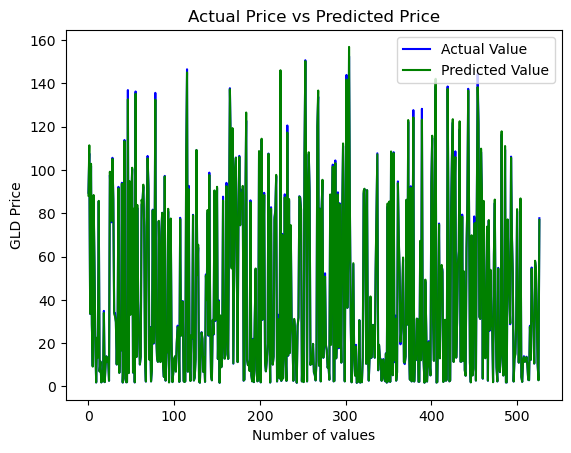

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

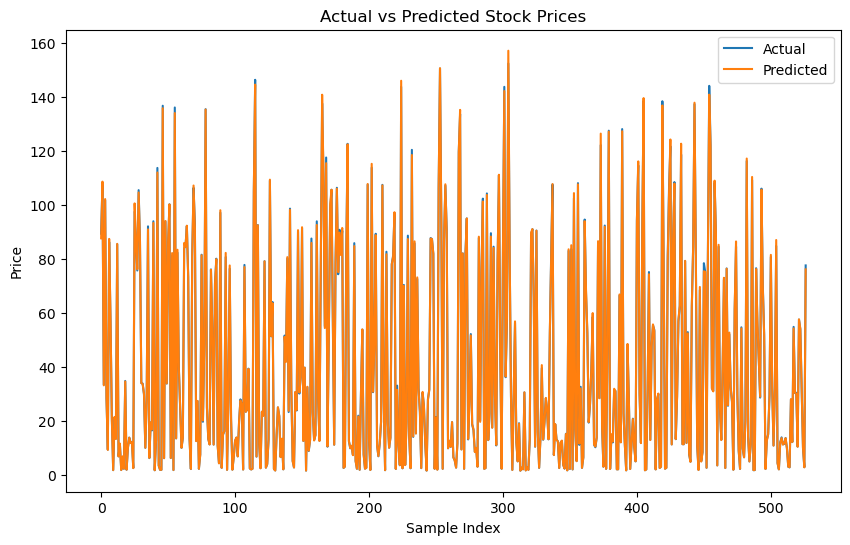

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 2.67752677,  2.67742794,  2.58442605, ..., 99.08287611,
       97.41464607, 95.63067015])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value34
enter a value65
enter a value48
70.99023463902164


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AMD_model.pkl",'wb')
pickle.dump(model,file)
